In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'pandas'

In [ ]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [ ]:
df = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/train.csv')

In [ ]:
df.shape

(300000, 32)

In [ ]:
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train.shape, test.shape

((240000, 32), (60000, 32))

In [ ]:
X = train.drop(['id', 'target'], axis=1)
y = train['target']

cat_cols = [col for col in X.columns if X[col].dtype == 'object']
num_cols = [col for col in X.columns if X[col].dtype != 'object']

print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical columns ({len(num_cols)}): {num_cols}")

Categorical columns (19): ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']
Numerical columns (11): ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10']



Distribution of cat0:
cat0
A    178929
B     61071
Name: count, dtype: int64


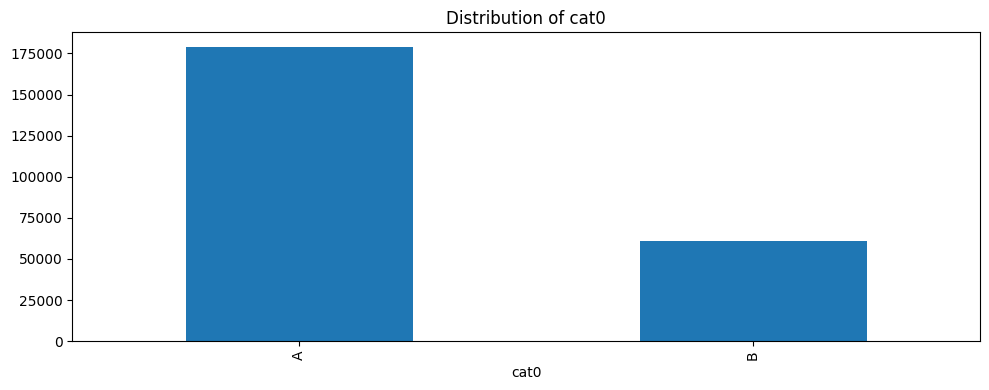


Distribution of cat1:
cat1
I    72497
F    35230
K    33525
L    25553
H    13724
N    10595
G     9049
M     9012
A     8402
J     8088
O     7027
B     5438
C     1352
D      328
E      180
Name: count, dtype: int64


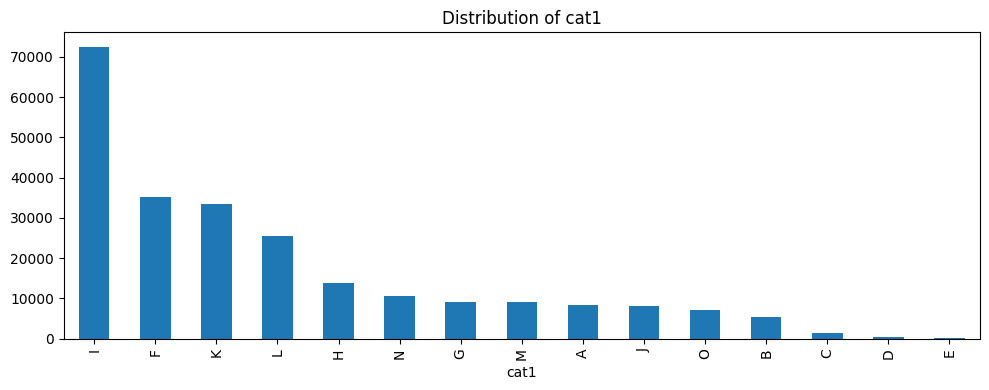


Distribution of cat2:
cat2
A    134831
C     31110
D     18229
G     14549
Q      8689
F      7888
J      7361
M      6430
I      4241
L      3228
O      2208
N       283
B       176
H       176
S       168
U       141
R       104
K        99
E        89
Name: count, dtype: int64


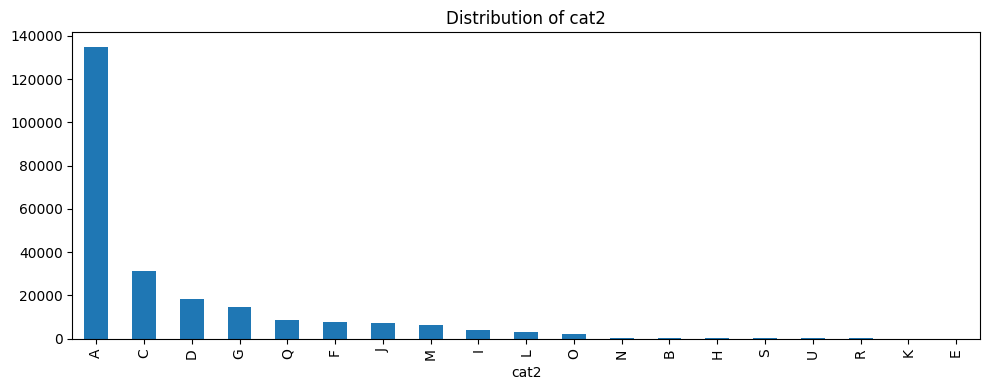

In [ ]:
import matplotlib.pyplot as plt

for col in cat_cols[:3]:
    print(f"\nDistribution of {col}:")
    print(train[col].value_counts())
    
    plt.figure(figsize=(10, 4))
    train[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

<Figure size 1500x1000 with 0 Axes>

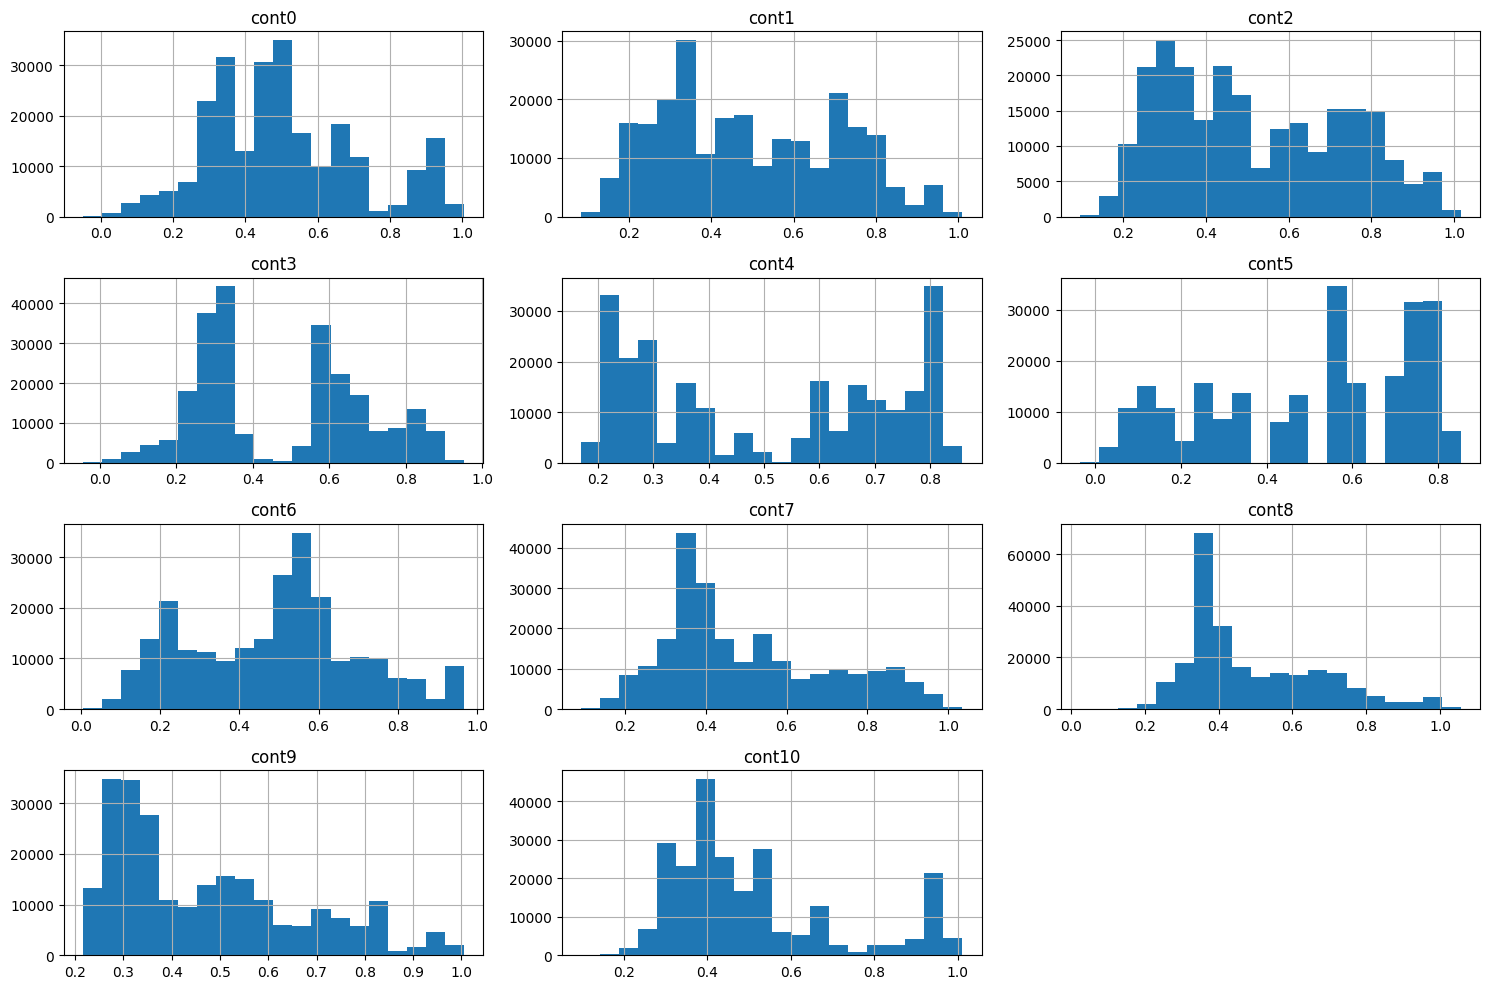

In [ ]:
X[num_cols].describe()

plt.figure(figsize=(15, 10))
X[num_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# WOE (Weight of Evidence)

In [2]:
sample_cat = cat_cols[0]

NameError: name 'cat_cols' is not defined

In [ ]:
sample_cat

'cat0'

In [ ]:
groups = train.groupby([sample_cat])['target'].agg(['count', 'sum'])
groups.columns = ['n_obs', 'n_pos']
groups['n_neg'] = groups['n_obs'] - groups['n_pos']

In [ ]:
groups

,n_obs,n_pos,n_neg
cat0,,,
A,178929,59910,119019
B,61071,3841,57230


In [ ]:
groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()

In [ ]:
groups

,n_obs,n_pos,n_neg,prop_pos,prop_neg
cat0,,,,,
A,178929,59910,119019,0.93975,0.675289
B,61071,3841,57230,0.06025,0.324711


In [ ]:
groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']

In [ ]:
groups

,n_obs,n_pos,n_neg,prop_pos,prop_neg,woe,iv
cat0,,,,,,,
A,178929,59910,119019,0.93975,0.675289,0.330473,0.087397
B,61071,3841,57230,0.06025,0.324711,-1.684433,0.445467


In [ ]:
groups.replace([np.inf, -np.inf], 0, inplace=True)
groups.fillna(0, inplace=True)

In [ ]:
woe_dict = groups['woe'].to_dict()
iv = groups['iv'].sum()

In [ ]:
woe_dict, iv

({'A': 0.33047318959107624, 'B': -1.6844325893298433}, 0.5328640513938434)

In [ ]:
X_woe = X.copy()
X_woe[f'{sample_cat}_woe'] = X_woe[sample_cat].map(woe_dict)

In [ ]:
X_woe[[sample_cat, f'{sample_cat}_woe']]

,cat0,cat0_woe
254099,B,-1.684433
53461,A,0.330473
247984,A,0.330473
209067,A,0.330473
185997,A,0.330473
...,...,...
119879,B,-1.684433
259178,B,-1.684433
131932,A,0.330473
146867,B,-1.684433


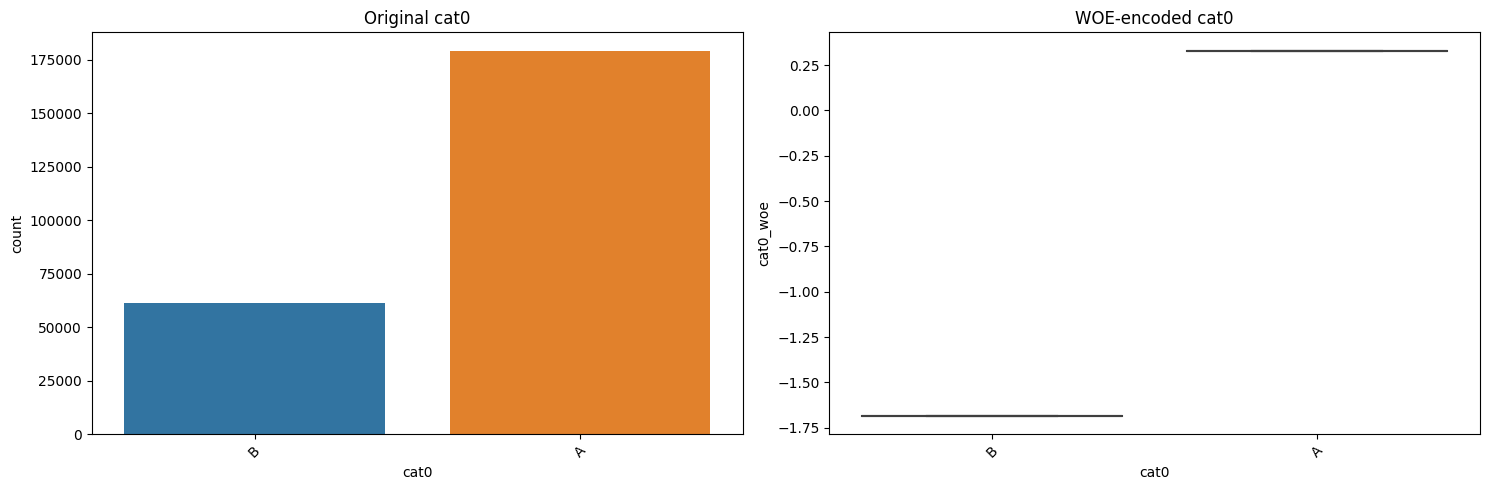

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=sample_cat, data=X, ax=ax[0])
ax[0].set_title(f'Original {sample_cat}')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.boxplot(x=sample_cat, y=f'{sample_cat}_woe', data=X_woe, ax=ax[1])
ax[1].set_title(f'WOE-encoded {sample_cat}')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

# One Hot Encoding

In [ ]:
X_dummy = X.copy()
X_dummy = pd.get_dummies(X_dummy, columns=cat_cols, drop_first=True)

In [ ]:
X['cat2'].value_counts()

cat2
A    134831
C     31110
D     18229
G     14549
Q      8689
F      7888
J      7361
M      6430
I      4241
L      3228
O      2208
N       283
B       176
H       176
S       168
U       141
R       104
K        99
E        89
Name: count, dtype: int64

In [ ]:
X.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
254099,B,M,F,A,E,G,E,AW,Y,W,MJ,A,A,A,A,B,D,D,B,0.136528,0.158880,0.241366,0.316379,0.597810,0.226669,0.568740,0.168526,0.263084,0.349155,0.260808
53461,A,G,Q,A,F,AB,C,AH,K,A,HX,B,A,A,B,D,B,C,C,0.668561,0.491503,0.441523,0.239773,0.255564,0.782164,0.319098,0.376074,0.373659,0.613428,0.472800
247984,A,K,A,A,C,BI,C,E,AU,F,CS,A,B,A,B,D,B,D,B,0.464504,0.432082,0.430172,0.272920,0.820504,0.557219,0.457611,0.441664,0.721024,0.271835,0.322575
209067,A,K,A,A,F,BI,A,AL,L,A,HQ,A,A,A,B,D,D,D,B,0.709037,0.752207,0.761392,0.778366,0.800075,0.772982,0.730863,0.710302,0.745487,0.971073,0.585071
185997,A,I,D,A,E,BI,C,AV,AE,A,DP,A,A,A,B,B,B,D,B,0.474071,0.213323,0.354421,0.619004,0.794750,0.307437,0.487469,0.361823,0.375954,0.459699,0.394398


In [ ]:
X_dummy.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cat0_B,cat1_B,cat1_C,cat1_D,cat1_E,cat1_F,cat1_G,cat1_H,cat1_I,cat1_J,cat1_K,cat1_L,cat1_M,cat1_N,cat1_O,cat2_B,cat2_C,cat2_D,cat2_E,cat2_F,cat2_G,cat2_H,cat2_I,cat2_J,cat2_K,cat2_L,cat2_M,cat2_N,cat2_O,cat2_Q,cat2_R,cat2_S,cat2_U,cat3_B,cat3_C,cat3_D,cat3_E,cat3_F,cat3_G,cat3_H,cat3_I,cat3_J,cat3_K,cat3_L,cat3_N,cat4_B,cat4_C,cat4_D,cat4_E,cat4_F,cat4_G,cat4_H,cat4_I,cat4_J,cat4_K,cat4_L,cat4_M,cat4_N,cat4_O,cat4_P,cat4_Q,cat4_R,cat4_S,cat4_T,cat5_AA,cat5_AB,cat5_AE,cat5_AF,cat5_AG,cat5_AH,cat5_AI,cat5_AJ,cat5_AK,cat5_AL,cat5_AM,cat5_AN,cat5_AO,cat5_AP,cat5_AQ,cat5_AR,cat5_AS,cat5_AT,cat5_AU,cat5_AV,cat5_AW,cat5_AX,cat5_AY,cat5_B,cat5_BA,cat5_BB,cat5_BC,cat5_BD,cat5_BE,cat5_BF,cat5_BG,cat5_BH,cat5_BI,cat5_BJ,cat5_BK,cat5_BL,cat5_BM,cat5_BN,cat5_BO,cat5_BP,cat5_BQ,cat5_BR,cat5_BS,cat5_BT,cat5_BU,cat5_BV,cat5_BX,cat5_BY,cat5_C,cat5_CA,cat5_CB,cat5_CC,cat5_CD,cat5_CE,cat5_CF,cat5_CG,cat5_CH,cat5_CI,cat5_CJ,cat5_CK,cat5_CL,cat5_D,cat5_E,cat5_F,cat5_G,cat5_H,cat5_I,cat5_J,cat5_K,cat5_L,cat5_M,cat5_N,cat5_O,cat5_P,cat5_Q,cat5_R,cat5_S,cat5_T,cat5_U,cat5_V,cat5_X,cat5_Y,cat5_ZZ,cat6_B,cat6_C,cat6_D,cat6_E,cat6_F,cat6_G,cat6_I,cat6_K,cat6_M,cat6_O,cat6_Q,cat6_S,cat6_U,cat6_W,cat6_Y,cat7_AA,cat7_AB,cat7_AC,cat7_AD,cat7_AE,cat7_AF,cat7_AG,cat7_AH,cat7_AI,cat7_AJ,cat7_AK,cat7_AL,cat7_AM,cat7_AN,cat7_AO,cat7_AP,cat7_AQ,cat7_AR,cat7_AS,cat7_AT,cat7_AU,cat7_AV,cat7_AW,cat7_AX,cat7_AY,cat7_B,cat7_BA,cat7_C,cat7_D,cat7_E,cat7_F,cat7_G,cat7_H,cat7_I,cat7_J,cat7_K,cat7_L,cat7_M,cat7_N,cat7_O,cat7_P,cat7_Q,cat7_R,cat7_S,cat7_T,cat7_U,cat7_V,cat7_W,cat7_X,cat7_Y,cat8_AB,cat8_AC,cat8_AD,cat8_AE,cat8_AF,cat8_AG,cat8_AH,cat8_AI,cat8_AJ,cat8_AK,cat8_AL,cat8_AM,cat8_AN,cat8_AO,cat8_AP,cat8_AQ,cat8_AR,cat8_AS,cat8_AT,cat8_AU,cat8_AV,cat8_AW,cat8_AX,cat8_AY,cat8_B,cat8_BA,cat8_BB,cat8_BC,cat8_BD,cat8_BE,cat8_BF,cat8_BG,cat8_BH,cat8_BI,cat8_BJ,cat8_BK,cat8_BL,cat8_BM,cat8_BN,cat8_BO,cat8_C,cat8_E,cat8_F,cat8_G,cat8_H,cat8_I,cat8_J,cat8_K,cat8_L,cat8_M,cat8_N,cat8_O,cat8_P,cat8_Q,cat8_S,cat8_T,cat8_U,cat8_V,cat8_X,cat8_Y,cat9_B,cat9_C,cat9_D,cat9_E,cat9_F,cat9_G,cat9_I,cat9_J,cat9_L,cat9_N,cat9_O,cat9_Q,cat9_R,cat9_S,cat9_U,cat9_V,cat9_W,cat9_X,cat10_AB,cat10_AC,cat10_AD,cat10_AE,cat10_AF,cat10_AG,cat10_AH,cat10_AJ,cat10_AK,cat10_AL,cat10_AM,cat10_AN,cat10_AP,cat10_AR,cat10_AS,cat10_AT,cat10_AU,cat10_AV,cat10_AW,cat10_AY,cat10_BA,cat10_BB,cat10_BC,cat10_BD,cat10_BF,cat10_BG,cat10_BI,cat10_BL,cat10_BM,cat10_BO,cat10_BP,cat10_BQ,cat10_BS,cat10_BT,cat10_BV,cat10_BX,cat10_BY,cat10_C,cat10_CB,cat10_CC,cat10_CD,cat10_CF,cat10_CG,cat10_CH,cat10_CI,cat10_CJ,cat10_CK,cat10_CL,cat10_CM,cat10_CN,cat10_CO,cat10_CP,cat10_CQ,cat10_CR,cat10_CS,cat10_CT,cat10_CU,cat10_CW,cat10_CX,cat10_CY,cat10_D,cat10_DA,cat10_DC,cat10_DD,cat10_DE,cat10_DF,cat10_DH,cat10_DI,cat10_DJ,cat10_DK,cat10_DL,cat10_DM,cat10_DN,cat10_DO,cat10_DP,cat10_DQ,cat10_DR,cat10_DS,cat10_DT,cat10_DU,cat10_DV,cat10_DW,cat10_DX,cat10_DY,cat10_E,cat10_EA,cat10_EB,cat10_EC,cat10_ED,cat10_EE,cat10_EF,cat10_EG,cat10_EH,cat10_EI,cat10_EK,cat10_EL,cat10_EN,cat10_EO,cat10_EP,cat10_EQ,cat10_ES,cat10_EU,cat10_EV,cat10_EW,cat10_EY,cat10_F,cat10_FA,cat10_FB,cat10_FC,cat10_FD,cat10_FE,cat10_FF,cat10_FG,cat10_FH,cat10_FI,cat10_FJ,cat10_FK,cat10_FL,cat10_FM,cat10_FN,cat10_FO,cat10_FP,cat10_FQ,cat10_FR,cat10_FS,cat10_FT,cat10_FV,cat10_FW,cat10_FX,cat10_G,cat10_GA,cat10_GB,cat10_GC,cat10_GD,cat10_GE,cat10_GF,cat10_GG,cat10_GH,cat10_GI,cat10_GJ,cat10_GK,cat10_GL,cat10_GM,cat10_GN,cat10_GQ,cat10_GR,cat10_GS,cat10_GT,cat10_GU,cat10_GV,cat10_GW,cat10_GX,cat10_GY,cat10_HA,cat10_HB,cat10_HC,cat10_HE,cat10_HF,cat10_HG,cat10_HH,cat10_HI,cat10_HJ,cat10_HK,cat10_HL,cat10_HM,cat10_HN,cat10_HO,cat10_HP,cat10_HQ,cat10_HR,cat10_HU,cat10_HV,cat10_HW,cat10_HX,cat10_HY,cat10_I,cat10_IA,cat10_IB,cat10_IC,cat10_ID,cat10_IE,cat10_IF,cat10_IG,cat10_IH,cat10_IJ,cat10_IK,cat10_IL,cat10_IM,cat10_IN,cat10_IO,cat10_IP,cat10_IQ,cat10_IR,cat10_IT,cat10_IU,cat10_IV,cat10_IX,cat10_IY,c

In [ ]:
X_dummy.shape, X.shape

((240000, 614), (240000, 30))

In [ ]:
X_dummy.shape

# Woe for All Categorical

In [ ]:
# Function to perform WOE encoding for all categorical columns
def woe_encode_all_categorical(df, cat_columns, target_col):
    df_woe = df.copy()
    
    woe_mappings = {}
    iv_values = {}
    
    for col in cat_columns:
        print(f"Processing {col}...")
        
        groups = df.groupby([col])[target_col].agg(['count', 'sum'])
        groups.columns = ['n_obs', 'n_pos']
        groups['n_neg'] = groups['n_obs'] - groups['n_pos']
        
        groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
        groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
        
        groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
        groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
        
        groups.replace([np.inf, -np.inf], 0, inplace=True)
        groups.fillna(0, inplace=True)
        
        woe_dict = groups['woe'].to_dict()
        iv = groups['iv'].sum()
        
        woe_mappings[col] = woe_dict
        iv_values[col] = iv
        
        df_woe[f'{col}_woe'] = df_woe[col].map(woe_dict)
    
    iv_df = pd.DataFrame({
        'Feature': list(iv_values.keys()),
        'Information_Value': list(iv_values.values())
    }).sort_values('Information_Value', ascending=False)
    
    print("\nInformation Value Summary:")
    print(iv_df)
    
    return df_woe, woe_mappings, iv_values

In [ ]:
ids = train.pop('id')

In [ ]:
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
254099,B,M,F,A,E,G,E,AW,Y,W,MJ,A,A,A,A,B,D,D,B,0.136528,0.158880,0.241366,0.316379,0.597810,0.226669,0.568740,0.168526,0.263084,0.349155,0.260808,0
53461,A,G,Q,A,F,AB,C,AH,K,A,HX,B,A,A,B,D,B,C,C,0.668561,0.491503,0.441523,0.239773,0.255564,0.782164,0.319098,0.376074,0.373659,0.613428,0.472800,1
247984,A,K,A,A,C,BI,C,E,AU,F,CS,A,B,A,B,D,B,D,B,0.464504,0.432082,0.430172,0.272920,0.820504,0.557219,0.457611,0.441664,0.721024,0.271835,0.322575,0
209067,A,K,A,A,F,BI,A,AL,L,A,HQ,A,A,A,B,D,D,D,B,0.709037,0.752207,0.761392,0.778366,0.800075,0.772982,0.730863,0.710302,0.745487,0.971073,0.585071,0
185997,A,I,D,A,E,BI,C,AV,AE,A,DP,A,A,A,B,B,B,D,B,0.474071,0.213323,0.354421,0.619004,0.794750,0.307437,0.487469,0.361823,0.375954,0.459699,0.394398,0


Processing cat0...
Processing cat1...
Processing cat2...
Processing cat3...
Processing cat4...
Processing cat5...
Processing cat6...
Processing cat7...
Processing cat8...
Processing cat9...
Processing cat10...
Processing cat11...
Processing cat12...
Processing cat13...
Processing cat14...
Processing cat15...
Processing cat16...
Processing cat17...
Processing cat18...

Information Value Summary:
   Feature  Information_Value
16   cat16           1.372764
15   cat15           1.074355
18   cat18           0.766476
10   cat10           0.626824
1     cat1           0.619044
8     cat8           0.536697
0     cat0           0.532864
14   cat14           0.491198
2     cat2           0.487768
7     cat7           0.470383
11   cat11           0.366439
17   cat17           0.358713
4     cat4           0.301403
13   cat13           0.198929
9     cat9           0.185592
6     cat6           0.172565
5     cat5           0.057061
12   cat12           0.039464
3     cat3           0.037588


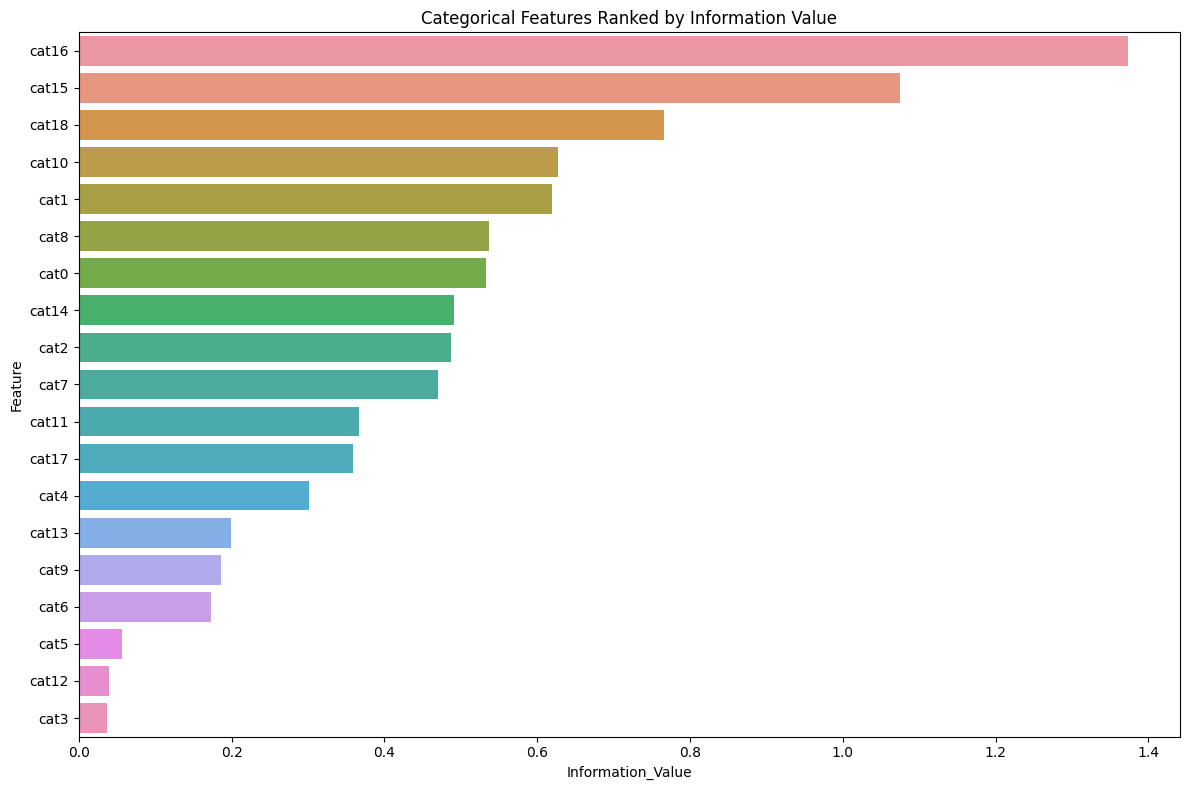


Sample of WOE transformations for the first few rows:

cat0:
  Original: B → WOE: -1.6844
  Original: A → WOE: 0.3305
  Original: A → WOE: 0.3305
  Original: A → WOE: 0.3305
  Original: A → WOE: 0.3305

cat1:
  Original: M → WOE: 0.3278
  Original: G → WOE: 1.3132
  Original: K → WOE: -0.1367
  Original: K → WOE: -0.1367
  Original: I → WOE: -0.8643

cat2:
  Original: F → WOE: 0.5785
  Original: Q → WOE: 2.1274
  Original: A → WOE: -0.3075
  Original: A → WOE: -0.3075
  Original: D → WOE: -0.3170


In [ ]:
X_with_target = train.copy()
X_woe_all, woe_mappings, iv_values = woe_encode_all_categorical(
    X_with_target, cat_cols, 'target'
)

X_woe_only = X_woe_all.drop(cat_cols, axis=1)

plt.figure(figsize=(12, 8))
iv_df = pd.DataFrame({
    'Feature': list(iv_values.keys()),
    'Information_Value': list(iv_values.values())
}).sort_values('Information_Value', ascending=False)

sns.barplot(x='Information_Value', y='Feature', data=iv_df)
plt.title('Categorical Features Ranked by Information Value')
plt.tight_layout()
plt.show()

n_samples = 5
print("\nSample of WOE transformations for the first few rows:")
for col in cat_cols[:3]:  # Show just first 3 categorical features
    original_col = train[col].head(n_samples)
    woe_col = X_woe_all[f'{col}_woe'].head(n_samples)
    
    print(f"\n{col}:")
    for i in range(n_samples):
        print(f"  Original: {original_col.iloc[i]} → WOE: {woe_col.iloc[i]:.4f}")

In [ ]:
X_woe_only

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target,cat0_woe,cat1_woe,cat2_woe,cat3_woe,cat4_woe,cat5_woe,cat6_woe,cat7_woe,cat8_woe,cat9_woe,cat10_woe,cat11_woe,cat12_woe,cat13_woe,cat14_woe,cat15_woe,cat16_woe,cat17_woe,cat18_woe
254099,0.136528,0.158880,0.241366,0.316379,0.597810,0.226669,0.568740,0.168526,0.263084,0.349155,0.260808,0,-1.684433,0.327758,0.578481,-0.0401,-0.482065,-2.096602,0.229024,-0.658458,-0.426518,-1.691137,-0.463067,-0.278371,0.075192,-0.075507,-0.792206,-0.856165,-1.015269,-0.302094,-0.430517
53461,0.668561,0.491503,0.441523,0.239773,0.255564,0.782164,0.319098,0.376074,0.373659,0.613428,0.472800,1,0.330473,1.313239,2.127376,-0.0401,0.064438,0.242442,0.260990,0.473441,1.701610,0.232651,-0.288499,1.356779,0.075192,-0.075507,0.646259,1.419912,1.566391,1.464051,1.759093
247984,0.464504,0.432082,0.430172,0.272920,0.820504,0.557219,0.457611,0.441664,0.721024,0.271835,0.322575,0,0.330473,-0.136748,-0.307499,-0.0401,-0.687835,-0.003746,0.260990,-0.491696,0.035850,-0.675027,0.314196,-0.278371,-0.526571,-0.075507,0.646259,1.419912,1.566391,-0.302094,-0.430517
209067,0.709037,0.752207,0.761392,0.778366,0.800075,0.772982,0.730863,0.710302,0.745487,0.971073,0.585071,0,0.330473,-0.136748,-0.307499,-0.0401,0.064438,-0.003746,-0.282158,1.215328,-0.733826,0.232651,0.442158,-0.278371,0.075192,-0.075507,0.646259,1.419912,-1.015269,-0.302094,-0.430517
185997,0.474071,0.213323,0.354421,0.619004,0.794750,0.307437,0.487469,0.361823,0.375954,0.459699,0.394398,0,0.330473,-0.864264,-0.316994,-0.0401,-0.482065,-0.003746,0.260990,-0.597056,-0.395073,0.232651,-0.080711,-0.278371,0.075192,-0.075507,0.646259,-0.856165,1.566391,-0.302094,-0.430517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.363296,0.429143,0.569741,0.545833,0.791338,0.732475,0.588881,0.363121,0.350189,0.256299,0.497965,0,-1.684433,-0.864264,-0.307499,-0.0401,-0.482065,-0.003746,0.260990,-0.491696,-0.254186,-0.369783,-1.102119,-0.278371,0.075192,-0.075507,-0.792206,-0.856165,-1.015269,-0.302094,-0.430517
259178,0.476194,0.645166,0.616845,0.669082,0.355588,0.146009,0.234756,0.548152,0.598984,0.295456,0.531402,0,-1.684433,-0.864264,-0.307499,-0.0401,0.064438,-0.003746,-0.282158,-0.644498,0.362210,-1.111676,-0.549575,-0.278371,-0.526571,-0.075507,-0.792206,-0.856165,-1.015269,-0.302094,-0.430517
131932,0.868462,0.787108,0.756139,0.848968,0.732155,0.733459,0.217324,0.875010,0.530865,0.706670,0.967233,0,0.330473,-0.374890,1.632877,-0.0401,-0.482065,-0.039575,-0.282158,0.378348,-0.499841,0.232651,-1.401904,1.356779,0.075192,-0.075507,0.646259,1.419912,1.566391,-0.302094,-0.430517
146867,0.467966,0.183596,0.246870,0.316478,0.215323,0.266695,0.398207,0.346828,0.342561,0.306834,0.416631,0,-1.684433,-0.864264,-0.654432,-0.0401,0.064438,0.242442,0.229024,0.473441,-0.985558,0.232651,-2.119526,1.356779,0.075192,-0.075507,-0.792206,-0.856165,-1.015269,-0.302094,-0.430517


# Correlation Filter

In [ ]:
%%time

X = X_woe_only.drop(columns='target')

corr_matrix = X.corr().abs()

CPU times: user 665 ms, sys: 44.4 ms, total: 710 ms
Wall time: 708 ms


In [ ]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Find feature pairs with correlation greater than a threshold
threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display highly correlated pairs
if high_corr_pairs:
    print("Highly correlated feature pairs:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} and {feat2}: {corr:.4f}")
else:
    print(f"No feature pairs with correlation above {threshold} found.")

# To remove one feature from each highly correlated pair
# (typically the one with lower correlation with target)
features_to_drop = []
for feat1, feat2, _ in high_corr_pairs:
    # Compare correlation with target
    if abs(X[feat1].corr(y)) < abs(X[feat2].corr(y)):
        features_to_drop.append(feat1)
    else:
        features_to_drop.append(feat2)

# Remove duplicates
features_to_drop = list(set(features_to_drop))
print(f"Features to drop due to high correlation: {features_to_drop}")

# Create filtered dataset
X_filtered = X.drop(columns=features_to_drop)
print(f"Original shape: {X.shape}, New shape: {X_filtered.shape}")

Highly correlated feature pairs:
cont0 and cont10: 0.8078
cont1 and cont2: 0.8613
Features to drop due to high correlation: ['cont2', 'cont0']
Original shape: (240000, 30), New shape: (240000, 28)


# RFE

In [ ]:
X_filtered.head()

,cont1,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cat0_woe,cat1_woe,cat2_woe,cat3_woe,cat4_woe,cat5_woe,cat6_woe,cat7_woe,cat8_woe,cat9_woe,cat10_woe,cat11_woe,cat12_woe,cat13_woe,cat14_woe,cat15_woe,cat16_woe,cat17_woe,cat18_woe
254099,0.158880,0.316379,0.597810,0.226669,0.568740,0.168526,0.263084,0.349155,0.260808,-1.684433,0.327758,0.578481,-0.0401,-0.482065,-2.096602,0.229024,-0.658458,-0.426518,-1.691137,-0.463067,-0.278371,0.075192,-0.075507,-0.792206,-0.856165,-1.015269,-0.302094,-0.430517
53461,0.491503,0.239773,0.255564,0.782164,0.319098,0.376074,0.373659,0.613428,0.472800,0.330473,1.313239,2.127376,-0.0401,0.064438,0.242442,0.260990,0.473441,1.701610,0.232651,-0.288499,1.356779,0.075192,-0.075507,0.646259,1.419912,1.566391,1.464051,1.759093
247984,0.432082,0.272920,0.820504,0.557219,0.457611,0.441664,0.721024,0.271835,0.322575,0.330473,-0.136748,-0.307499,-0.0401,-0.687835,-0.003746,0.260990,-0.491696,0.035850,-0.675027,0.314196,-0.278371,-0.526571,-0.075507,0.646259,1.419912,1.566391,-0.302094,-0.430517
209067,0.752207,0.778366,0.800075,0.772982,0.730863,0.710302,0.745487,0.971073,0.585071,0.330473,-0.136748,-0.307499,-0.0401,0.064438,-0.003746,-0.282158,1.215328,-0.733826,0.232651,0.442158,-0.278371,0.075192,-0.075507,0.646259,1.419912,-1.015269,-0.302094,-0.430517
185997,0.213323,0.619004,0.794750,0.307437,0.487469,0.361823,0.375954,0.459699,0.394398,0.330473,-0.864264,-0.316994,-0.0401,-0.482065,-0.003746,0.260990,-0.597056,-0.395073,0.232651,-0.080711,-0.278371,0.075192,-0.075507,0.646259,-0.856165,1.566391,-0.302094,-0.430517


In [ ]:
X_filtered.shape

(240000, 28)

In [ ]:
X_train = X_filtered
y_train = X_woe_only['target']

Features selected by RFE:
1. cont1
2. cont5
3. cat0_woe
4. cat1_woe
5. cat2_woe
6. cat7_woe
7. cat8_woe
8. cat10_woe
9. cat11_woe
10. cat13_woe
11. cat14_woe
12. cat15_woe
13. cat16_woe
14. cat17_woe
15. cat18_woe


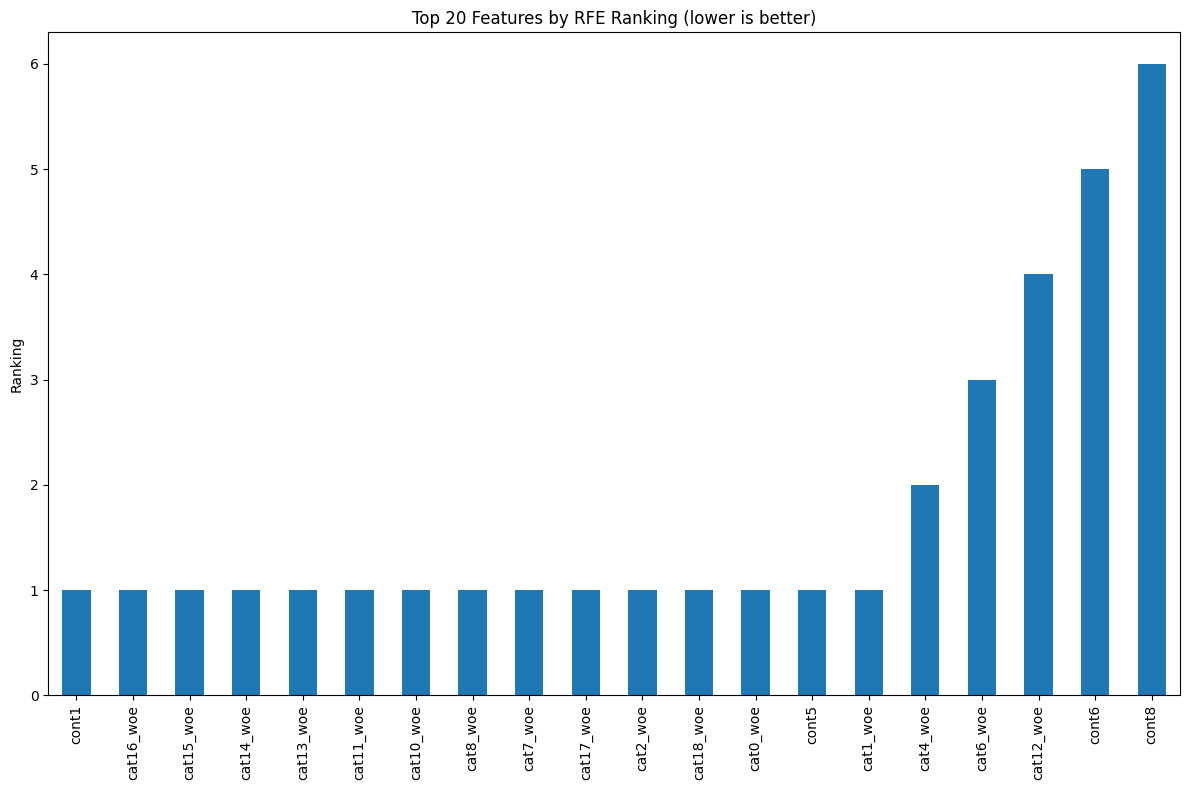

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)

model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=15, step=1)
rfe.fit(X_train_scaled, y_train)

rfe_selected_features = X_train.columns[rfe.support_].tolist()

print("Features selected by RFE:")
for i, feature in enumerate(rfe_selected_features, 1):
    print(f"{i}. {feature}")

plt.figure(figsize=(12, 8))
feature_ranking = pd.Series(rfe.ranking_, index=X_train.columns)
feature_ranking.sort_values().head(20).plot(kind='bar')
plt.title('Top 20 Features by RFE Ranking (lower is better)')
plt.ylabel('Ranking')
plt.tight_layout()
plt.show()